<font size="6"><b> Incertitudes de mesure </b></font>

# Quelques définitons

La quantification de la **variabilité** d’une mesure $x$ d’une grandeur est appelée **incertitude-type** et notée $u(x)$. Par définition, l’incertitude-type correspond à **l’écart-type** de la distribution des données issues d’une répétition de la mesure *dans les mêmes conditions*.
> L’incertitude-type permet de quantifier la variabilité d’une mesure. Ainsi, deux mesures $x_1$ et $x_2$ issues du même processus sont séparées en moyenne de quelques u(x) par construction de l’incertitude-type en tant qu’écart-type.

<img src="dispersion.png" width="700"/>

On notera un résultat sous la forme :
$$
\boxed{m=x \pm u(x)}
$$

**On gardera systématiquement 2 chiffres sisgnificatifs pour l'affichage de l'incertitude-type $u(x)$, et on affichera le résultat $m$ avec un nombre de chiffres significatifs compatible.**
> On sort du paradigme << *nombre de chiffres significatifs* = *incertitude* >>. Le nombre de chiffres significatifs ne sert plus qu'à améliorer la lisibilité du résultat.
>
> Ainsi, on pourra écrire :
> $m=1,23 \pm 0,28$ cm ou $m=0,0123 \pm 0,0028$ m, etc.


# Estimation du résultat d’une mesure et de l’incertitude-type
## Expériences sans variabilité observée (incertitudes de type B)
Certaines expériences n’ont pas de variabilité observée. Cela signifie qu’en reproduisant la mesure, on retrouve systématiquement le même résultat. C’est par exemple le cas lorsque l’on mesure naïvement la taille d’un objet avec la même règle graduée.

Cette absence de variabilité observée n’implique pas une absence de variabilité. Cela signifie juste qu’à l’échelle de cette expérience, avec l’appareil de mesure choisi, la variabilité est plus faible que la précision de la mesure.
> Ce phénomène n’est pas uniquement lié à l’appareil de mesure. En effet, selon les conditions expérimentales, il n’est parfois pas matériellement possible (ou souhaité) de reproduire le processus de mesure. Dans ce cas, une seule valeur est accessible et il faut tout de même estimer son incertitude-type.

Lors d’une **mesure sans variabilité observée** :
- On estime la valeur mesurée $x$ avec la **graduation la plus proche** (ou tout simplement la valeur affichée par l'appareil) plus petite plage dans laquelle l’expérimentateur ;
- On estime la **demi-largeur** $\Delta_{1/2}$ de la plus petite plage dans laquelle on est certain de trouver la valeur recherchée, et on estime **l'incertitude-type** $u(x)$ par :
$$
\boxed{u(x)=\dfrac{\Delta_{1/2}}{\sqrt{3}}}
$$
> Ce facteur $1/\sqrt{3}$ correspond à l'écart-type d'une distribution unitaire uniforme.

Ci-dessous un exemple :

In [4]:
import numpy as np

demi_largeur=0.28

print('u(x)=',demi_largeur/np.sqrt(3))

u(x)= 0.16165807537309523


Le résultat de la mesure est bien sûr toujours :
$$
m=x \pm u(x)
$$
> L’intervalle $\Delta_{1/2}$ doit être pris le plus faible possible selon les critères personnels de l’expérimentateur et selon les conditions de l’expérience. Il ne doit pas y avoir de règle générale. Par exemple avec une règle graduée au millimètre, si la valeur tombe directement sur une graduation, il est naturel de prendre $\Delta_{1/2}=0,25$ mm, tandis que si la valeur est entre deux graduations, on prendra plus logiquement $\Delta_{1/2}=0,5$ mm. Et enfin, un étudiant peu sûr de lui peut choisir de prendre dans le même cas $\Delta_{1/2}=1$ mm.
>
> Pour les appareils de mesure numérique, il est nécessaire de consulter la notice de l’appareil. Toutefois, bien souvent, les notices ne précisent pas clairement la nature de la valeur de la précision fournie (est-ce une incertitude-type ? Un intervalle ? Un écart-type d’une distribution gaussienne ?). Dans ce cas, on suppose que l’incertitude affichée sur la notice est un intervalle $\Delta_{1/2}$ de certitude de trouver la mesure.

## Expériences avec variabilité observée (incertitudes de type A)
Lorsque la variabilité des mesures est accessible, il convient de répéter un grand nombre de fois le processus mesure pour estimer l’incertitude-type sur une unique réalisation de la mesure.

L'écart-type est alors assimilé à l'incertitude-type :
$$
\boxed{u(x)=\sigma}
$$

On peut calculer l'écart-type d'un ensemble de mesures à l'aide du langage Python. Ci-dessous un exemple :

In [5]:
import numpy as np

valeurs=[
1,2,3,4
]

ecarttype=np.std(valeurs)

print('sigma=',ecarttype)

sigma= 1.118033988749895


Pour gagner en précision, nous pouvons utiliser les différents points de mesures effectués pour aller plus loin
qu’une simple estimation de l’incertitude-type sur une mesure unique : **utiliser la moyenne des mesures** $\overline{x}$ comme résultat de mesure.

Par contre, l'incertitude-type sur la moyenne des valeurs $u(\overline{x})$ n'est pas égale à l'incertitude-type sur chaque valeur $u(x)$ (obtenue en calculant l'écart-type sur la distribution de ces valeurs).

Ainsi le résultat s'écrira :
$$
\boxed{m=\overline{x} \pm u(\overline{x})}
$$

Il existe une formule mathématique permettant d’estimer cet écart-type $u(\overline{x})$ pour $N$ mesures :
$$
u(\overline{x})=\dfrac{u(x)}{\sqrt{N}}=\dfrac{\sigma}{\sqrt{N}}
$$
> En toute rigueur il faudrait remplacer $N$ par $N-1$, sinon un biais est introduit.

Ainsi, en une série de mesure, on obtient les points expérimentaux, leur incertitude-type, la moyenne de ces points et grâce à cette formule, l’incertitude-type sur la moyenne. On obtient ainsi une estimation plus précise de la grandeur à mesurer en modérant la variabilité de chaque prise de mesure unique.

Ci-dessous un exemple :

In [28]:
import numpy as np

valeurs=[
1,2,3,4
]

moyenne=np.average(valeurs)
ecarttype=np.std(valeurs)

print('x=',moyenne,'u(x)=',ecarttype/np.sqrt(len(valeurs)))

x= 2.5 u(x)= 0.5590169943749475


## Ajouter des barres d'incertitudes-type sur un graphe
Ci-dessous un exemple **que vous pouvez adapter** en fonction de vos besoins :
> La ligne suivante sert à l'affichage des graphes dans le notebook.

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


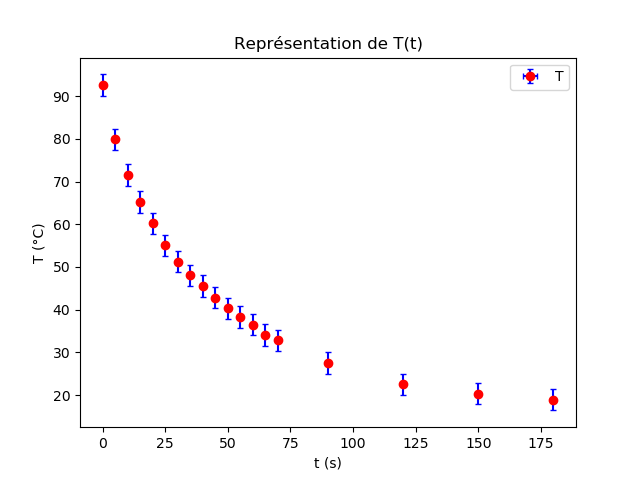

In [5]:
import matplotlib.pyplot as plt

# Listes des valeurs à traiter
liste_T=[92.6,79.9,71.5,65.2,60.2,55.1,51.2,48,45.5,42.8,40.3,38.3,36.5,34.1,32.8,27.5,22.5,20.3,18.9]
liste_t=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,90,120,150,180]

# Incertitudes sur chaque mesure
incert_x=0 # Incertitude-type sur l'abscisse
incert_y=2.5 # Incertitude-type sur l'ordonnée

# Représentation graphique
plt.figure()
plt.errorbar(liste_t,liste_T,incert_y,incert_x,fmt='ro',ecolor='blue',capsize=2)

plt.title('Représentation de T(t)')
plt.xlabel('t (s)')
plt.ylabel('T (°C)')
plt.legend(('T'))
plt.savefig('courbe_barres_incertitudes.png')
plt.show()

# Les incertitudes-type composées
Très souvent, la mesure expérimentale n’est pas le résultat recherché de l’expérience. Il faut souvent combiner des mesures entre elles pour obtenir le résultat souhaité.

## Incertitude-type composée de type somme
Supposons que l’on calcule $x=\alpha x_1+\beta x_2$. L’incertitude-type de $x$ est alors donnée par :
$$
\boxed{u(x)=\sqrt{(\alpha \ u(x_1))^2+(\beta \ u(x_2))^2}}
$$

Ci-dessous un exemple :

In [30]:
import numpy as np

ux1=1.2
ux2=0.6

alpha=1
beta=1

ux=np.sqrt((alpha*ux1)**2+(beta*ux2)**2)

print('u(x)=',ux)

u(x)= 1.3416407864998738


## Incertitudes-type composées de type produit
Supposons que l’on calcule $x=a x_1^\alpha x_2^\beta$. L’incertitude-type **relative** de $x$ est alors donnée par :
$$
\dfrac{u(x)}{x}=\sqrt{\left(\alpha \dfrac{u(x_1)}{x_1}\right)^2+\left(\beta \dfrac{u(x_2)}{x_2}\right)^2}
$$

Ci-dessous un exemple :

In [31]:
import numpy as np

x1=20.3
x2=10.0

ux1=1.2
ux2=0.6

a=1
alpha=1
beta=1

x=a*x1**alpha*x2**beta
ux=x*np.sqrt((alpha*ux1/x1)**2+(beta*ux2/x2)**2)

print('x=',x,'u(x)=',ux)

x= 203.0 u(x)= 17.098315706525014


## Incertitudes composées quelconques
Seules les deux formules précédentes sont à connaître, pour tous les autres cas, nous allons, à l’aide d’une simulation informatique utilisant une part d’aléatoire, calculer l’incertitude-type.
> On parle de **méthode Monte-Carlo**.

Le principe est de réaliser un tirage aléatoire de valeurs autour de la valeur mesurée, en faisant varier chaque paramètre selon une loi de distribution aléatoire définie. On détermine ensuite l'incertitude-type de la distribution de valeurs obtenues.

Ci-dessous un exemple **que vous pouvez adapter** en fonction de vos besoins :
> La ligne suivante sert à l'affichage des graphes dans le notebook.

In [21]:
%matplotlib notebook

x= 15.382000000000001 u(x)= 0.3541463464911055


<IPython.core.display.Javascript object>


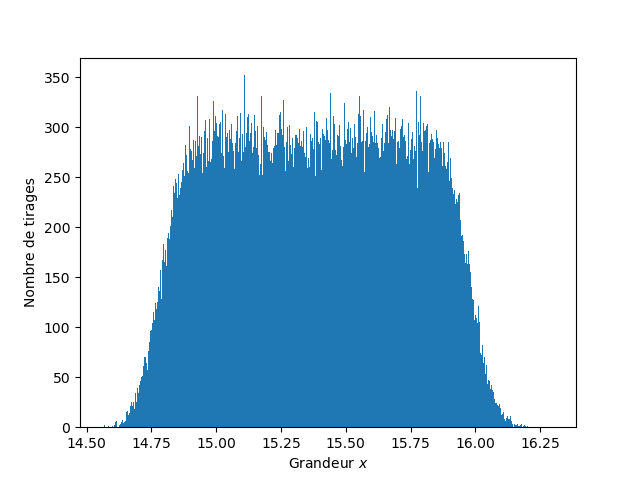

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

####### Partie à adapter ########
x1=1.10
x2=2.12

ux1=0.01
ux2=0.1

def x(x1,x2): # Définition de la loi permettant de déterminer x
    return 2*x1**3+6*x2

grandeur=y(x1,x2) # Calcul de m

def variations_aleatoires(): # Variation aléatoire de x (méthode Monte-carlo)
    return x(x1+loi_normale(ux1),
             x2+loi_rectangulaire(ux2))

####### Partie à ne pas modifier ########
def loi_normale(sigma) : # Loi de distribution normale
    return np.random.normal(0,sigma)

def loi_rectangulaire(sigma): # Loi de distribution rectangulaire
    return rd.uniform(-sigma,sigma)

distribution=[] # Distribution des valeurs
N=100000 # Nombre de points utilisés dans la méthode Monte-Carlo

for i in range(N):
    distribution.append(variations_aleatoires())

incertitude_type=np.std(distribution) # Calcul de l'incertitude-type (écart-type)

print('x=',grandeur,'u(x)=',incertitude_type)

plt.figure()
plt.hist(distribution,bins=500)
plt.xlabel('Grandeur $x$')
plt.ylabel('Nombre de tirages')
plt.show()

# La régression (ou ajustement) linéaire
## Principe
Prenons des listes de mesures x et y avec leurs incertitudes. La régression (ou ajustement) linéaire est une opération mathématique qui consiste à trouver les meilleurs coefficients $a$ et $b$ tels que $a x_i+b$ soient les plus proches en moyenne des points de mesures $y_i$.
> En toute rigueur, il faudrait parler de régression affine et non pas linéaire.
>> Bah oui :/

Une régression (ou ajustement) linéaire permet de trouver la *meilleure droite* modélisant le mieux le comportement de ces points. Mathématiquement, on peut optimiser par un calcul dit **des moindres carrés** ce procédé.
> Contrairement à une idée répandue, le coefficient $r^2$ n’a aucun intérêt pour valider un modèle physique ou pour estimer des incertitudes-type. Pour vous convaincre que le coefficient $r^2$ ne permet en rien de juger une régression linéaire, on peut regarder la vidéo suivante (dans laquelle le coefficient `cor` correspond au $r$) : [Vidéo](https://youtu.be/It4UA75z_KQ)

## Détermination de l'incertitude-type sur les paramètres par méthode Monte-Carlo
On commence par réaliser une régression linéaire sans incertitudes sur les valeurs mesurées. La pente et l’ordonnée à l’origine obtenues sont le résultat numérique de la mesure.

Pour estimer leurs incertitudes-type, il faut de plus estimer pour chaque point de mesure la valeur de son incertitude-type. Ensuite, à l’aide d’une simulation Monte-Carlo, on utilise cette variabilité individuelle pour générer un grand nombre de distributions de points. Pour chacune de ces distributions, on réalise une régression (ou ajustement) linéaire ce qui conduira au final à un grand nombre de valeurs de a et de b. Il suffit ensuite de réaliser une étude statistique de ces données pour en déduire leur incertitude-type.
> Pour s’assurer qu’une régression linéaire est correcte, on tracera systématiquement sur un graphique les données mesurées ainsi que la droite de la régression linéaire. Le modèle sera validé si, à l’oeil, les points de mesure sont bien alignés et que la droite passe le plus proche de tous les points possibles, en incluant leurs incertitudes-type.

Ci-dessous un exemple **que vous pouvez adapter** en fonction de vos besoins :
> La ligne suivante sert à l'affichage des graphes dans le notebook.

In [ ]:
%matplotlib notebook

a= 10.072302383939773 u(a)= 0.01617700156695041
b= -0.28224592220830036 u(b)= 0.11413846026287951


<IPython.core.display.Javascript object>


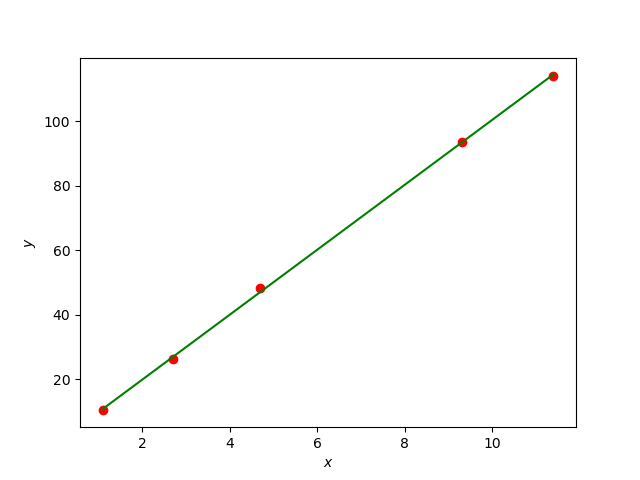

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

####### Partie à adapter ########
x=[1.1,2.7,4.7,9.3,11.4]
y=[10.4,26.4,48.3,93.5,114.1]

p=np.polyfit(x,y,1) # Ajustement de type a*x+b
a,b=p[0],p[1] # Valeurs de a et b

ux=0.01
uy=0.1

####### Partie à ne pas modifier ########
def variations_aleatoires(liste_x,liste_y): # Variation aléatoire de x (méthode Monte-carlo)
    liste_xa=[]
    liste_ya=[]
    for x,y in zip(liste_x,liste_y):
        liste_xa.append(x+loi_normale(ux))
        liste_ya.append(y+loi_normale(uy))
    return liste_xa,liste_ya

def loi_normale(sigma) : # Loi de distribution normale
    return np.random.normal(0,sigma)

def loi_rectangulaire(sigma): # Loi de distribution rectangulaire
    return rd.uniform(-sigma,sigma)

distribution_a=[] # Distribution des valeurs de a
distribution_b=[] # Distribution des valeurs de b
N=100000 # Nombre de points utilisés dans la méthode Monte-Carlo

for i in range(N):
    xa,ya=variations_aleatoires(x,y)
    p=np.polyfit(xa,ya,1)
    distribution_a.append(p[0])
    distribution_b.append(p[1])

incertitude_type_a=np.std(distribution_a) # Calcul de l'incertitude-type (écart-type) sur a
incertitude_type_b=np.std(distribution_b) # Calcul de l'incertitude-type (écart-type) sur b

print('a=',a,'u(a)=',incertitude_type_a)
print('b=',b,'u(b)=',incertitude_type_b)

yfit=[]
for xfit in x:
    yfit.append(a*xfit+b)

plt.figure()
plt.plot(x,y,'ro')
plt.plot(x,yfit,'g-')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# Comparaison de deux mesures : l'écart normalisé
Pour comparer 2 mesures, on utilise **l'écart normalisé** ou **z-score** :
$$
E_N=\dfrac{\left|m_2-m_1\right|}{\sqrt{u(m_1)^2+u(m_2)^2}}
$$

Par convention, on qualifie deux résultats de **compatibles** si leur écart normalisé vérifie la propriété :
$$
\boxed{E_N \lesssim 2}
$$
> Ce seuil à 2 est d’origine historique. On le retrouve dans de nombreux champs scientifiques, comme la médecine, la pharmacie, la biologie, la psychologie, l’économie, l’écologie, etc. Ce seuil peut différer selon le domaine : par exemple pour démontrer l’existence d’une nouvelle particule en physique subatomique, il faut atteindre un seuil de 5.

**Bibiographie :**
- Séminaire *Mesure et incertitude* de Julien Browaeys et Nicolas Décamp
- Document en ligne *Mesures et incertitudes* de Maxime Champion